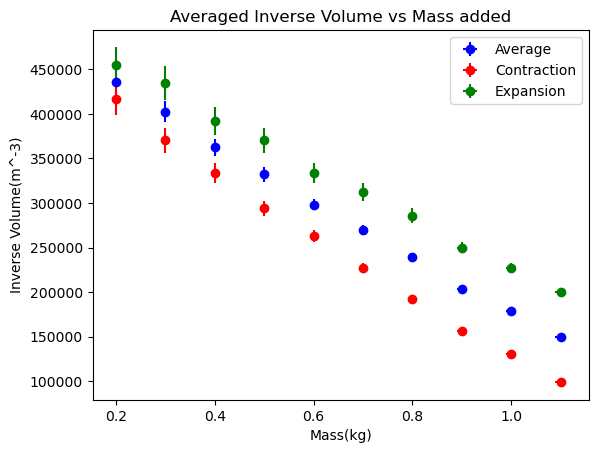

In [14]:
"""Code for plotting data"""

import matplotlib.pyplot as plt
import numpy as np

fname = 'AveragedData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(0, 1, 2, 3))

x = data[:, 0]
y = data[:, 2]
avg_x_sigma = data[:, 1]
avg_y_sigma = data[:, 3]

plt.errorbar(x, y, avg_y_sigma, avg_x_sigma, "bo")

fname = 'GasContractsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 7, 8))

x = data[:, 0]
y = data[:, 2]
con_x_sigma = data[:, 1]
con_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=con_y_sigma, xerr=con_x_sigma, fmt='ro')

fname = 'GasExpandsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 7, 8))

x = data[:, 0]
y = data[:, 2]
ex_x_sigma = data[:, 1]
ex_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='go')

plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Average", "Contraction", "Expansion"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(m^-3)")

plt.show()

Fit parameters:
slope = 2.801e+05 +/- 5.062e+03
1/v0 = 5.071e+05 +/- 4.850e+03

Goodness of fit - chi square measure:
Chi2 = 5.0060727609677445, Chi2/dof = 0.6257590951209681



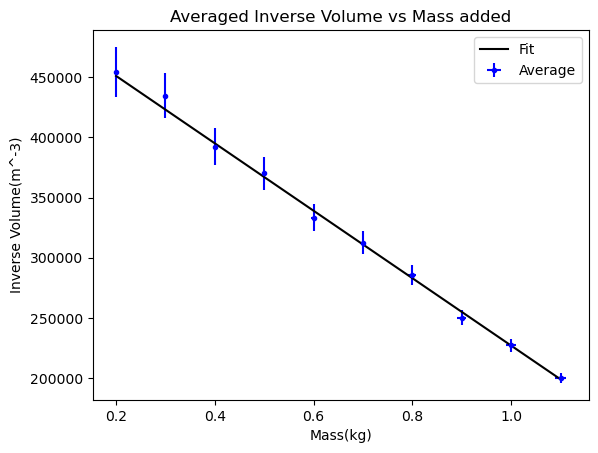

In [17]:
"""Code for fitting and finding chi squared of data vs fit"""

from scipy.optimize import curve_fit

def lin_fit(x, k, b):
    return -k*x+b

guesses = (-.320,.500)


fit_params, fit_cov = curve_fit(lin_fit, x, y, sigma=avg_y_sigma, p0=guesses,
                                maxfev=10**5)

# read out parameter results
param_names = ['slope', '1/v0']

fit_params_error = np.sqrt(np.diag(fit_cov))

print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# function that  calculates the chi square value of a fit
def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-lin_fit(x, *fit_parameters))**2/sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, avg_y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

marr = np.linspace(0.2, 1.1, 1000)
varr = -fit_params[0] * marr + fit_params[1]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='b.')
plt.plot(marr, varr, 'k-')
plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Fit", "Average", "Contraction", "Expansion"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(m^-3)")

plt.show()

In [18]:
"""Code for converting fit to R"""

n = 8.065E-5
g = 9.81
A = 1.7544E-4
uA = 2.3337E-6
T = 295.15
k = fit_params[0]
uk = fit_params_error[0]

R = g / (A * n * T * k)
uR = g / (n * T) * np.sqrt(A ** 2 * uk ** 2 + k ** 2 * uA ** 2)/(A ** 2 * k ** 2)

print("Gas constant R = {:.3f} \u00B1 {:.3f} J/(K*mol)".format(R, uR))


Gas constant R = 8.386 ± 0.188 J/(K*mol)
